In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Conv2D, MaxPooling2D,Dropout,MaxPooling1D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

ImportError: cannot import name 'np_utils' from 'keras.utils' (C:\Users\Administrator\anaconda3\Lib\site-packages\keras\utils\__init__.py)

In [15]:
dataset = pd.read_csv("C:/Users/Administrator/Desktop/DRDO/Test datasets/Ashok@49yr_2-9-22_MI_LH.csv")
dataset

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,label,EMG
0,105,-29,-137,15,90,20,-122,112,22,-11,...,39,-128,43,85,-5,-112,127,-14,cylindrical,EMG1
1,-29,-76,79,10,-59,-25,89,32,-121,73,...,-100,95,2,-33,-49,84,44,-131,cylindrical,EMG1
2,21,97,-5,-117,124,-8,-34,-65,81,27,...,-8,-27,-76,79,15,-61,-26,90,cylindrical,EMG1
3,34,-122,68,36,-14,-105,100,-3,-34,-51,...,-115,122,-9,-37,-65,81,27,-93,cylindrical,EMG1
4,-11,94,18,-121,109,11,-26,-89,87,8,...,59,-13,-109,109,-4,-38,-56,83,cylindrical,EMG1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-85,-68,100,45,-100,-9,112,-13,-120,55,...,126,-82,-106,102,58,-111,-20,123,tip,EMG3
536,2,-126,47,127,-78,-114,99,68,-112,-27,...,46,-114,-8,124,-21,-133,65,123,tip,EMG3
537,-90,-86,109,52,-113,-14,125,-12,-129,62,...,-31,-134,84,100,-108,-43,113,32,tip,EMG3
538,-119,1,135,-22,-142,89,88,-83,-56,93,...,-100,-15,118,-21,-135,56,130,-89,tip,EMG3


In [16]:
dataset_features_ch1 =  dataset[dataset['EMG'] == 'EMG1']

In [17]:
dataset_features_ch1.shape

(180, 1002)

In [18]:
dataset_labels = dataset_features_ch1['label']
dataset_features = dataset_features_ch1.drop(columns=['label','EMG'],axis=1)
dataset_features.shape

(180, 1000)

In [45]:
encoder = LabelEncoder()
encoder.fit(dataset_labels)
encoded_Y = encoder.transform(dataset_labels)
y = np_utils.to_categorical(encoded_Y)
y.shape

(180, 6)

In [46]:
x = np.array(dataset_features[:])
x = x.reshape(x.shape[0],x.shape[1],1)
x.shape

(180, 1000, 1)

In [47]:
x = np.asarray(x).astype(np.float32)

In [48]:
from tensorflow import keras

In [49]:
kfold = KFold(n_splits=3, shuffle=True)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
print(x.shape, y.shape)

(180, 1000, 1) (180, 6)


In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 998, 64)           256       
                                                                 
 conv1d_3 (Conv1D)           (None, 996, 64)           12352     
                                                                 
 dropout_1 (Dropout)         (None, 996, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 498, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 31872)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               3187300   
                                                      

In [52]:
Results = {'accuracy':[], 'loss':[], 'val_accuracy':[], 'val_loss':[]}

In [53]:
fold_no = 1
for train, test in kfold.split(x, y):
    print('------------------------------------------------------------------------')
    print(f"Training for fold {fold_no} ...")
    history = model.fit(x[train], y[train], epochs=100, batch_size=100, verbose=1, validation_data= (x[test], y[test]))
    # Increase fold number
    fold_no = fold_no + 1
    #Results = appendHist(Results, history)
    #Results_Acc = Results_Acc.append(history.history['accuracy'])
    Results['accuracy'].append(history.history['accuracy'])
    Results['loss'].append(history.history['loss'])
    Results['val_accuracy'].append(history.history['val_accuracy'])
    Results['val_loss'].append(history.history['val_loss'])

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
2/2 [==============================] - 1s 255ms/step - loss: 69.6389 - accuracy: 0.1333 - val_loss: 242.8903 - val_accuracy: 0.1000
Epoch 2/100
2/2 [==============================] - 0s 84ms/step - loss: 190.0831 - accuracy: 0.2000 - val_loss: 64.9809 - val_accuracy: 0.1667
Epoch 3/100
2/2 [==============================] - 0s 91ms/step - loss: 57.1468 - accuracy: 0.1583 - val_loss: 12.3148 - val_accuracy: 0.1000
Epoch 4/100
2/2 [==============================] - 0s 85ms/step - loss: 8.9239 - accuracy: 0.2167 - val_loss: 7.3006 - val_accuracy: 0.2333
Epoch 5/100
2/2 [==============================] - 0s 99ms/step - loss: 5.8582 - accuracy: 0.2333 - val_loss: 2.2604 - val_accuracy: 0.3833
Epoch 6/100
2/2 [==============================] - 0s 84ms/step - loss: 1.9318 - accuracy: 0.3833 - val_loss: 1.6589 - val_accuracy: 0.3000
Epoch 7/100
2/2 [==============================] - 0s 

In [54]:
A = Results['accuracy']
B = Results['val_accuracy']
C = Results['loss']
D = Results['val_loss']

In [55]:
#Ac = np.array([A[0], A[1], A[2]])
TrainAcc = np.concatenate((A[0], A[1],A[2]), axis=0)
TestAcc = np.concatenate((B[0], B[1],B[2]), axis=0)
Trainloss = np.concatenate((C[0], C[1],C[2]), axis=0)
Testloss = np.concatenate((D[0], D[1],D[2]), axis=0)

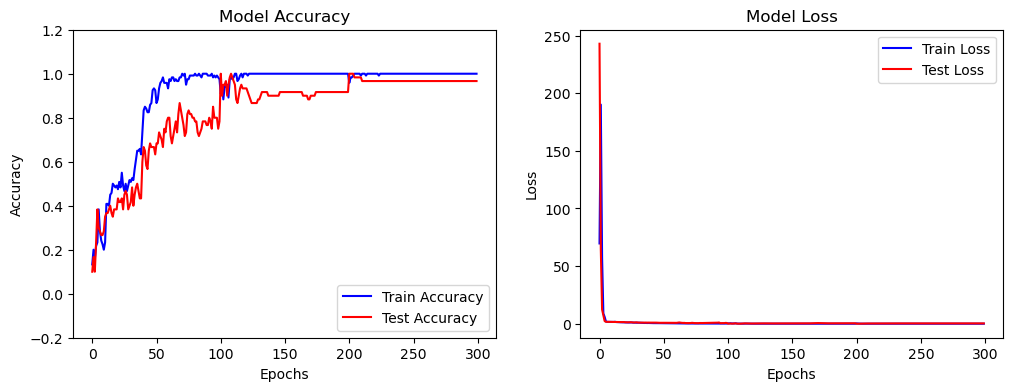

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Model Accuracy and Loss')
fig.set_figheight(4)
fig.set_figwidth(12)
ax1.plot(TrainAcc,'b')
ax1.plot(TestAcc,'r-')
ax1.set_ylim(-0.2, 1.2)
ax1.set_title('Model Accuracy')
ax1.set(xlabel='Epochs',ylabel='Accuracy')
ax1.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
ax2.plot(Trainloss,'b')
ax2.plot(Testloss,'r-')
#ax2.set_ylim(-0.2, 1.2)
ax2.set_title('Model Loss')
ax2.set(xlabel='Epochs',ylabel='Loss')
#plt.ylabel('Accuracy')

ax2.legend(['Train Loss', 'Test Loss'], loc='upper right')

In [57]:
# Evaluate the model
loss, acc = model.evaluate(x, y, verbose=2)
print("Model Accuracy: {:5.2f}%".format(100 * acc))


6/6 - 0s - loss: 0.0942 - accuracy: 0.9889 - 82ms/epoch - 14ms/step
Model Accuracy: 98.89%


In [58]:
model.save('model1_30_5.h5')

In [59]:
import tensorflow as tf

In [ ]:
direct = os.getcwd()
Model_Fname = direct+'\model1_30_5'
print(Model_Fname)

C:\Users\Administrator\Desktop\arduino\DRDO\cache\model1_30_5


In [31]:
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="C:/Users/Administrator/Desktop/arduino/DRDO/Saved test models/SE2T2.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = (1,1000,1)
output_shape = (1,6)
print(input_details)

interpreter.resize_tensor_input(input_details[0]['index'], input_shape)
interpreter.resize_tensor_input(output_details[0]['index'], output_shape)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# data
data="""-307	-20	112	-254	-331	16	109	-254	-276	89	65	-295	-299	85	-7	-301	-342	78	-52	-292	-337	72	-79	-300	-333	71	-125	-271	-216	85	-185	-272	-141	105	-260	-299	-58	108	-241	-307	5	113	-266	-335	-27	100	-265	-305	83	49	-268	-318	80	-17	-292	-309	85	-68	-306	-313	77	-99	-296	-301	78	-150	-261	-172	100	-172	-277	-121	108	-256	-302	-40	110	-225	-330	-10	109	-250	-331	23	96	-282	-295	79	41	-279	-313	83	40	-285	-319	78	-87	-289	-331	62	-123	-273	-249	87	-178	-245	-141	101	-241	-269	-59	110	-290	-295	-32	113	-211	-333	32	95	-246	-324	78	66	-285	-280	89	11	-275	-288	86	-2	-238	-327	75	-111	-307	-312	76	-163	-263	-179	96	-203	-240	-136	106	-261	-250	-36	116	-262	-307	-13	109	-251	-299	20	59	-270	-315	78	15	-279	-275	89	-40	-276	-287	82	-65	-285	-332	71	-119	-312	-286	81	-172	-248	-187	94	-219	-223	-91	111	-260	-274	-11	115	-266	-321	-16	100	-261	-333	43	80	-278	-306	78	-32	-276	-291	91	-27	-258	-294	89	-97	-268	-310	81	-145	-292	-252	85	-180	-263	-136	100	-219	-256	-52	116	-262	-246	-48	116	-257	-292	-19	96	-273	-322	42	8	-274	-301	85	7	-268	-291	90	-26	-283	-279	87	-93	-232	-312	86	-87	-276	-278	72	-190	-265	-177	94	-223	-282	-89	110	-254	-247	-37	115	-268	-298	11	108	-245	-331	34	91	-284	-303	77	-26	-291	-324	81	-27	-285	-287	85	-37	-256	-279	87	-71	-257	-280	75	-168	-275	-201	95	-218	-229	-38	115	-218	-238	-65	113	-266	-257	-7	111	-249	-296	-1	95	-259	-322	73	-22	-265	-297	84	-58	-282	-264	92	-15	-317	-269	94	-62	-273	-261	84	-137	-275	-248	85	-200	-273	-93	105	-241	-231	-73	108	-259	-272	-18	118	-260	-296	-3	85	-246	-299	30	-6	-286	-294	68	-25	-267	-290	85	-81	-257	-277	83	-91	-265	-266	88	-161	-272	-247	88	-192	-258	-136	103	-259	-261	-64	108	-255	-237	-29	110	-248	-261	-15	66	-247	-267	10	0	-267	-288	59	-38	-225	-279	95	-17	-268	-286	84	-72	-262	-231	92	-73	-223	-221	93	-143	-250	-199	94	-214	-255	-113	105	-263	-230	-29	113	-231	-224	-17	103	-244	-265	-15	28	-252	-278	51	-61	-282	-269	70	-86	-240	-278	94	-102	-267	-280	86	-116	-248	-222	93	-139	-249	-161	101	-223	-246	-81	109	-267	-245	-31	108	-242	-238	-19	110	-251	-249	-8	-18	-264	-242	53	-40	-234	-264	74	-111	-273	-268	84	-123	-267	-272	84	-107	-236	-228	94	-171	-234	-126	104	-215	-246	-87	110	-255	-242	-45	83	-242	-218	10	66	-251	-245	-16	13	-221	-234	39	-72	-257	-215	68	-89	-259	-262	75	-122	-259	-263	90	-116	-232	-196	91	-135	-220	-169	99	-219	-237	-128	108	-245	-265	-27	93	-242	-234	-21	52	-220	-230	4	22	-243	-227	37	-70	-262	-207	74	-85	-269	-249	64	-119	-202	-250	84	-140	-252	-211	93	-141	-236	-151	78	-171	-219	-89	104	-224	-231	-49	88	-239	-221	-21	57	-242	-228	-8	14	-202	-214	10	-9	-255	-222	61	-73	-261	-223	55	-121	-266	-248	86	-130	-250	-243	83	-146	-237	-192	103	-159	-219	-137	90	-212	-217	-63	96	-252	-225	-30	46	-274	-223	-2	51	-229	-209	6	-11	-251	-226	41	-97	-238	-217	75	-109	-250	-237	60	-131	-248	-242	73	-165	-240	-186	87	-159	-224	-112	92	-190	-217	-74	84	-253	-221	-47	56	-245	-222	0	21	-246	-222	9	-1	-256	-209	70	-72	-256	-213	52	-95	-241	-225	51	-134	-247	-236	48	-158	-239	-181	72	-183	-226	-127	88	-205	-232	-48	90	-228	-225	-51	38	-237	-224	-4	18	-239	-246	-21	-2	-242	-199	34	-64	-256	-208	68	-108	-235	-221	60	-137	-246	-235	57	-135	-236	-193	96	-155	-231	-153	63	-182	-213	-39	102	-224	-196	-40	52	-215	-230	-13	39	-234	-238	-2	-6	-236	-199	43	-46	-254	-207	49	-69	-235	-218	55	-171	-246	-231	61	-139	-249	-215	72	-168	-219	-174	68	-212	-229	-64	85	-189	-210	-52	60	-215	-210	-14	28	-242	-234	-11	-15	-243	-204	36	-37	-251	-202	32	-77	-251	-195	58	-89	-236	-201	58	-138	-243	-241	52	-162	-216	-197	64	-185	-229	-128	56	-223	-223	-55	64	-210	-212	-12	15	-222	-232	-25	-2	-209	-227	-9	-37	-239	-199	55	-53	-233	-187	46	-91	-244	-213	54	-119	-236	-228	63	-135	-216	-189	53	-163	-238	-137	66	-224	-218	-86	71	-209	-207	-30	53	-222	-199	-43	12	-235	-227	-29	-34	-233	-222	45	-49	-251	-191	34	-85	-258	-188	38	-99	-232	-198	70	-139	-217	-205	64	-169	-233	-157	56	-200	-213	-90	52	-235	-228	-49	65	-230	-186	-26	20	-211	-229	-34	-26	-212	-227	35	-31	-242	-201	23	-76	-235	-193	46	-97	-210	-171	51	-151	-224	-193	39	-167	-219	-168	52	-201	-216	-107	46	-212	-225	-46	49	-208	-208	-27	25	-213	-213	-32	-22	-218	-218	0	-53	-265	-214	37	-107	-268	-199	35	-100	-219	-183	57	-98	-224	-192	52	-142	-216	-170	55	-211	-224	-105	52	-222	-214	-27	35	-207	-204	-41	11	-211	-207	0	-21	-219	-217	20	-55	-247	-200	32	-103	-255	-197
"""
# Split the data into individual values and convert them into a list
data_values = [int(val) for val in data.split()]

data_list = data.split()
input_data = np.array([data_values], dtype=np.float32)
# print(input_data.reshape(1,1000,1).shape)
input_data = input_data.reshape(input_data.shape[0], input_data.shape[1], 1)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
# predicted_label_index = np.argmax(tflite_model_predictions)
# actions = ["cylindrical", "hook", "lateral", "palmer", "spherical", "tip"]

# predicted_label = actions[predicted_label_index]
# print(predicted_label)

[{'name': 'serving_default_conv1d_4_input:0', 'index': 0, 'shape': array([   1, 1000,    1]), 'shape_signature': array([  -1, 1000,    1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [32]:
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
tflite_model_predictions

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [33]:
predicted_label_index = np.argmax(tflite_model_predictions)
predicted_label_index

1

In [34]:
actions = ["cylindrical", "hook", "lateral", "palmer", "spherical", "tip"]

predicted_label = actions[predicted_label_index]
predicted_label

'hook'

In [66]:
import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="C:/Users/Administrator/Desktop/arduino/DRDO/Saved test models/ashok.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = (1,1000,1)
output_shape = (1,6)
print(input_details)

interpreter.resize_tensor_input(input_details[0]['index'], input_shape)
interpreter.resize_tensor_input(output_details[0]['index'], output_shape)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Data for input 1
data1 = """-29	-76	79	10	-59	-25	89	32	-121	73	32	-17	-104	101	-8	-39	-50	83	35	-130	43	94	-5	-113	126	-10	-53	-70	77	21	-81	-10	90	22	-121	112	7	-18	-89	88	2	-36	-41	87	38	-128	46	79	0	-110	118	-15	-36	-64	78	24	-105	0	90	13	-120	131	-2	-23	-80	84	1	-42	-40	74	34	-123	52	70	-11	-108	118	-12	-36	-55	82	20	-113	12	91	-3	-121	132	-7	-29	-76	75	5	-54	-29	87	34	-122	67	49	-14	-105	108	-12	-41	-53	80	34	-132	22	94	-2	-115	130	-15	-34	-72	79	13	-68	-23	89	26	-121	87	26	-19	-100	96	-6	-38	-46	83	36	-131	34	95	-7	-112	127	-15	-35	-69	77	15	-74	-15	91	23	-120	99	23	-21	-97	96	-7	-37	-48	84	37	-132	31	93	-6	-115	127	-13	-33	-69	76	16	-73	-17	93	26	-120	101	18	-19	-95	96	-7	-38	-48	82	37	-132	29	95	-7	-112	126	-17	-36	-68	79	14	-75	-17	89	20	-122	98	21	-18	-96	95	-7	-35	-47	83	36	-130	35	95	-5	-111	128	-18	-33	-70	78	11	-67	-20	89	25	-121	89	22	-19	-101	95	-8	-38	-46	82	36	-130	35	95	-5	-112	125	-17	-34	-68	77	18	-77	-18	92	23	-121	96	20	-17	-98	94	-2	-34	-50	83	45	-132	21	88	-2	-117	121	-10	-31	-70	78	32	-85	-20	95	30	-124	89	19	-13	-100	91	8	-32	-48	87	51	-131	16	86	2	-119	122	-5	-28	-69	81	36	-87	-21	96	30	-123	85	19	-13	-100	92	10	-32	-47	88	52	-130	21	79	0	-118	118	-4	-31	-67	80	36	-91	-20	97	28	-123	94	18	-14	-99	93	8	-31	-49	87	52	-130	17	85	0	-118	122	-5	-30	-69	81	34	-87	-19	96	25	-123	98	18	-15	-97	92	4	-33	-49	86	46	-131	19	89	-4	-116	122	-8	-33	-68	80	29	-89	-18	94	23	-121	98	20	-16	-97	94	2	-34	-50	85	45	-131	19	91	-5	-116	124	-8	-34	-67	81	28	-88	-20	94	23	-122	98	21	-15	-96	92	3	-33	-49	85	46	-131	22	88	-5	-114	122	-9	-34	-67	80	28	-89	-19	93	22	-121	101	20	-17	-95	94	3	-36	-46	85	43	-129	25	87	-7	-115	120	-8	-34	-66	80	28	-92	-18	94	21	-122	104	16	-19	-92	90	5	-39	-40	87	44	-127	32	85	-6	-115	121	-8	-35	-67	81	29	-96	-10	95	16	-122	114	8	-20	-90	86	9	-43	-39	88	44	-127	37	76	-7	-114	117	-7	-34	-65	81	34	-100	-10	97	14	-123	120	3	-20	-86	84	15	-44	-35	90	46	-126	37	64	-5	-114	111	-3	-32	-62	83	42	-115	-10	98	14	-124	131	0	-21	-81	82	24	-52	-33	93	46	-126	44	54	-4	-114	109	1	-32	-64	83	46	-117	-8	99	13	-124	126	2	-21	-84	82	23	-52	-32	93	46	-125	45	53	-5	-113	108	0	-29	-63	83	46	-120	-4	99	10	-123	132	0	-21	-79	82	21	-54	-32	92	43	-124	49	54	-7	-112	109	-3	-34	-59	82	41	-123	1	97	6	-121	133	-5	-26	-78	81	17	-57	-29	90	38	-122	61	42	-11	-107	102	-2	-37	-54	83	42	-135	12	97	-2	-118	129	-8	-30	-71	79	20	-71	-23	91	29	-123	81	30	-17	-102	97	0	-36	-51	83	42	-132	21	97	-6	-116	126	-9	-34	-69	80	23	-81	-18	94	23	-122	100	24	-18	-97	94	1	-37	-47	85	41	-131	24	90	-7	-114	122	-10	-36	-66	80	28	-99	-5	95	15	-120	119	7	-22	-89	86	7	-41	-38	87	42	-127	41	77	-9	-114	117	-10	-36	-62	80	31	-107	-1	95	8	-121	125	3	-23	-83	85	11	-48	-32	90	38	-125	50	60	-10	-109	109	-8	-37	-58	82	35	-121	9	96	4	-120	133	-4	-27	-79	80	14	-55	-29	90	38	-124	54	52	-11	-110	107	-3	-36	-57	82	38	-127	9	96	2	-120	134	-4	-27	-78	80	16	-58	-29	89	37	-122	62	44	-13	-107	104	-2	-38	-53	85	41	-135	15	97	-4	-117	128	-9	-31	-72	79	21	-74	-20	92	28	-122	85	25	-17	-101	96	1	-37	-47	86	43	-132	23	91	-6	-116	123	-7	-35	-67	80	27	-88	-16	94	21	-121	100	22	-19	-96	93	3	-37	-45	85	42	-131	26	87	-6	-115	121	-8	-35	-67	81	28	-94	-11	94	17	-122	114	9	-21	-90	86	8	-43	-38	87	42	-127	41	74	-8	-113	116	-6	-35	-64	81	32	-107	-1	95	9	-122	126	1	-24	-84	83	11	-46	-34	89	40	-125	49	60	-10	-111	111	-5	-36	-60	82	36	-119	4	96	6	-122	133	-3	-27	-79	82	12	-57	-26	89	39	-121	54	55	-13	-108	104	-3	-36	-60	81	20	-135	14	99	6	-140	125	-6	-29	-73	80	19	-65	-27	91	34	-122	70	40	-11	-109	102	0	-37	-52	84	42	-134	16	98	-2	-119	128	-8	-30	-71	79	22	-75	-21	93	28	-122	85	27	-17	-100	95	2	-33	-49	84	44	-131
"""
data1_values = [int(val) for val in data1.split()]

# Data for input 2
data2 = """21	97	-5	-117	124	-8	-34	-65	81	27	-90	-16	94	20	-122	107	16	-21	-93	89	8	-40	-41	87	43	-128	36	82	-7	-114	119	-8	-35	-62	81	30	-105	-6	96	13	-122	130	3	-23	-83	84	10	-44	-35	89	42	-125	46	64	-9	-112	111	-5	-37	-58	82	36	-120	1	96	8	-122	135	-1	-25	-80	82	14	-54	-32	90	39	-124	54	55	-10	-109	108	-4	-36	-56	82	40	-134	9	96	2	-120	132	-7	-28	-75	81	17	-65	-27	89	36	-122	67	41	-14	-106	101	0	-36	-53	83	42	-135	14	96	-2	-117	129	-8	-31	-71	79	21	-74	-23	92	30	-122	83	32	-18	-101	98	0	-38	-49	85	42	-134	19	96	-6	-116	127	-9	-35	-67	80	25	-87	-21	92	23	-123	99	23	-15	-97	96	0	-37	-48	84	44	-132	21	97	-6	-115	125	-9	-36	-67	80	26	-92	-17	93	22	-122	112	12	-19	-89	89	6	-41	-41	87	43	-127	36	81	-7	-114	118	-7	-37	-61	80	31	-105	-4	95	13	-122	134	1	-24	-83	83	10	-44	-34	87	42	-126	47	64	-9	-112	112	-6	-38	-59	82	35	-119	3	96	8	-122	135	-2	-25	-79	82	12	-49	-32	89	39	-125	53	56	-9	-111	110	-4	-37	-57	82	37	-122	7	97	5	-121	134	-3	-27	-77	81	15	-55	-30	90	37	-122	64	45	-9	-108	107	-4	-37	-55	82	38	-126	7	95	4	-119	133	-5	-27	-75	80	17	-59	-28	90	37	-122	65	46	-11	-107	105	-4	-38	-55	83	41	-130	13	96	0	-117	129	-8	-33	-72	79	21	-70	-23	91	31	-121	81	29	-15	-101	96	0	-36	-49	85	42	-132	21	91	-5	-115	123	-9	-35	-66	79	26	-83	-16	93	22	-121	104	18	-18	-96	92	1	-36	-46	85	45	-130	27	83	-6	-114	119	-9	-36	-64	81	29	-98	-6	95	16	-121	116	5	-21	-87	85	10	-43	-35	88	43	-126	42	68	-7	-113	114	-8	-34	-62	80	34	-106	-2	95	10	-121	130	-1	-25	-81	82	12	-50	-30	90	40	-125	52	53	-9	-111	108	-6	-35	-58	81	37	-119	4	95	6	-123	133	-4	-26	-78	81	14	-55	-28	89	38	-122	57	45	-10	-108	106	-4	-37	-54	83	40	-130	10	97	1	-119	131	-8	-30	-74	79	16	-64	-24	91	33	-122	72	30	-12	-103	97	-2	-34	-49	85	42	-133	21	91	-3	-116	124	-13	-32	-68	79	24	-81	-17	93	23	-122	100	19	-17	-96	93	0	-35	-45	85	43	-130	27	85	-5	-115	120	-11	-35	-65	80	28	-96	-7	95	18	-121	111	7	-20	-90	86	7	-41	-37	87	42	-127	40	74	-7	-112	117	-9	-35	-63	79	29	-101	-2	95	12	-121	126	-2	-25	-82	81	12	-50	-26	91	37	-123	61	42	-11	-107	104	-3	-38	-53	83	38	-134	16	96	-1	-116	129	-9	-32	-71	78	18	-70	-21	92	30	-121	77	27	-16	-102	96	-1	-38	-48	84	40	-133	23	91	-5	-115	123	-11	-34	-67	79	24	-88	-16	94	20	-121	102	18	-20	-96	92	1	-35	-44	85	42	-130	29	84	-5	-114	120	-11	-36	-66	80	28	-95	-6	93	16	-119	111	6	-23	-90	86	7	-41	-37	88	41	-126	39	74	-9	-113	118	-11	-36	-63	80	30	-106	0	94	11	-119	126	0	-23	-84	83	7	-43	-35	88	42	-124	42	65	-8	-112	114	-9	-35	-61	80	32	-111	0	96	10	-121	130	0	-23	-82	82	11	-45	-31	89	39	-123	51	53	-9	-111	110	-7	-32	-59	81	35	-117	3	96	7	-122	132	-3	-25	-80	81	12	-51	-28	90	37	-123	56	46	-11	-108	105	-5	-36	-55	82	39	-131	12	97	0	-118	130	-10	-30	-72	79	18	-66	-23	92	33	-121	75	28	-16	-103	96	-1	-34	-51	85	42	-133	20	96	-4	-115	124	-11	-34	-66	56	20	-80	-18	94	21	-120	103	18	-19	-95	106	2	-38	-43	83	45	-128	33	79	-3	-112	119	-13	-14	-61	80	27	-94	-5	92	17	-121	121	4	-21	-87	62	-1	-38	-37	90	38	-133	41	77	-7	-111	116	-10	-37	-60	80	33	-106	5	96	7	-122	130	-20	-26	-80	83	11	-48	-32	89	38	-123	53	54	-9	-111	111	-9	-36	-58	81	34	-115	3	95	7	-121	132	-3	-24	-79	81	11	-49	-29	90	38	-122	54	52	-10	-108	108	-6	-38	-55	80	37	-125	14	95	0	-118	130	-9	-30	-72	80	16	-64	-26	91	31	-121	77	30	-14	-102	97	-2	-38	-49	83	40	-131	22	96	-5	-115	125	-13	-33	-71	78	20	-74	-22	91	26	-120	90	21	-17	-98	95	0	-37	-48	84	41	-131	25	90	-5	-115	123	-10	-36	-67	79	25	-88	-17	93	20	-121	104	14	-20	-92	90	3	-37	-40	87	41	-126	37	80	-8	-112	117	-11	-38	-62	80	28	-103	1	95	10	-120	127	-1	-24	-81	82	9	-49	-31	88	38	-124	49	57	-10	-110	108	-6	-39	-56	82	35	-127	11	95	0	-118	131	-8	-27	-76	79	15	-61	-26	90
"""
data2_values = [int(val) for val in data2.split()]

# Helper function to process a set of 1000 values through the TFLite model
def process_data(input_data):
    input_data = np.array([data_values], dtype=np.float32)
    input_data = input_data.reshape(input_data.shape[0], input_data.shape[1], 1)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    return interpreter.get_tensor(output_details[0]['index'])

# Process data1 through the TFLite model
predictions_data1 = process_data(data1_values)

# Process data2 through the TFLite model
predictions_data2 = process_data(data2_values)

# Combine the results
combined_predictions = np.concatenate((predictions_data1, predictions_data2), axis=0)

# Get the final predicted label
predicted_label_index = np.argmax(combined_predictions)
actions = ["cylindrical", "hook", "lateral", "palmer", "spherical", "tip"]
predicted_label = actions[predicted_label_index]
predicted1=np.argmax(predictions_data1)
predicted2=np.argmax(predictions_data2)
print("1:",predicted1)
print("2:",predicted2)

print("Predicted Label:", predicted_label)

[{'name': 'serving_default_conv1d_input:0', 'index': 0, 'shape': array([   1, 1000,    1]), 'shape_signature': array([  -1, 1000,    1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
1: 0
2: 0
Predicted Label: cylindrical


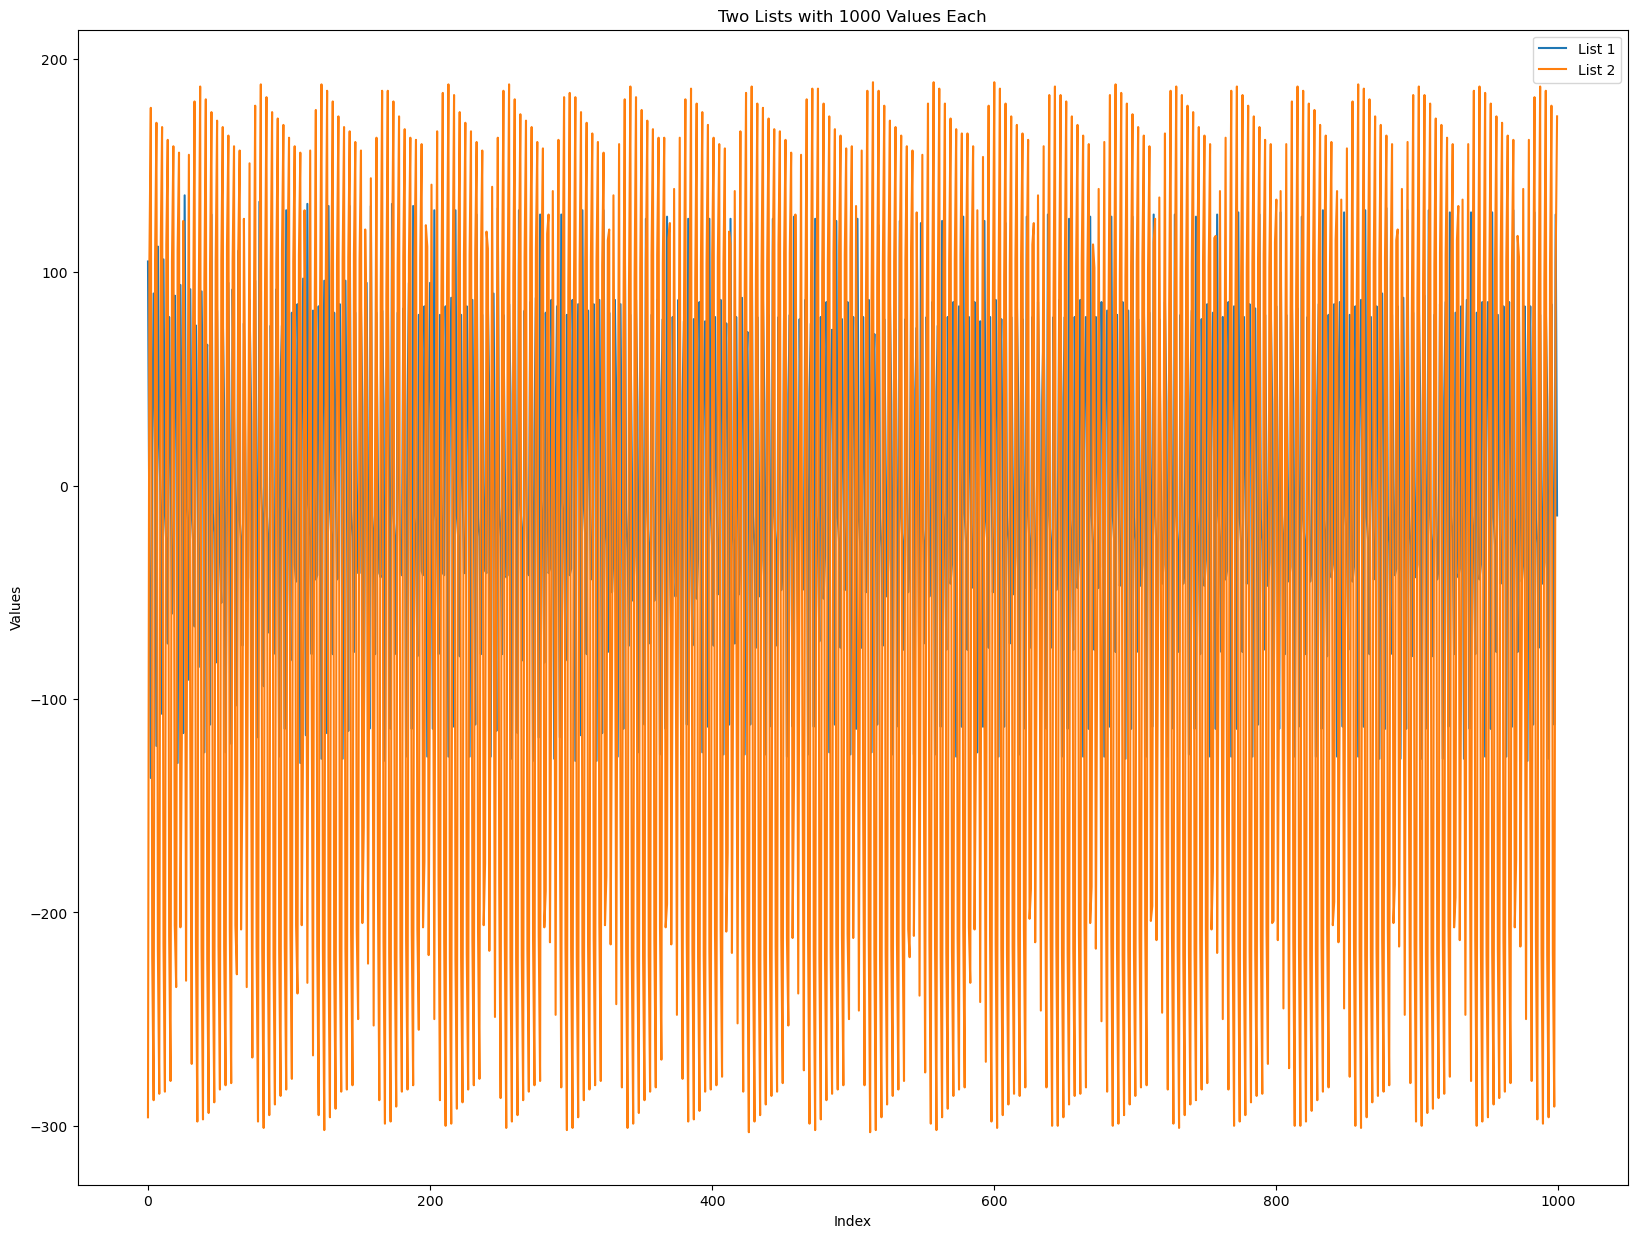

In [30]:
surya_data = """315	62	40	282	311	67	41	280	307	69	40	282	306	70	40	272	296	81	48	267	274	85	50	266	206	63	111	285	133	36	211	317	73	25	275	332	61	31	281	319	60	40	281	311	63	41	280	312	66	39	283	310	69	42	281	307	70	44	271	300	84	47	265	268	83	50	266	214	64	116	288	145	42	205	315	80	27	273	332	59	30	282	321	60	37	280	313	65	41	279	310	67	40	281	309	69	40	285	307	71	43	268	299	80	48	264	274	86	49	266	203	61	114	289	134	40	193	311	84	30	274	329	60	31	278	325	60	35	281	314	62	39	279	314	65	40	283	308	69	42	282	307	69	42	268	303	75	44	268	282	82	48	265	227	72	97	281	168	50	160	302	113	37	253	328	67	28	279	323	63	34	280	318	62	40	281	312	66	42	280	310	70	42	284	304	75	40	271	302	75	46	268	285	84	48	266	236	72	72	275	170	50	155	301	106	33	251	327	66	28	279	325	59	33	284	316	58	39	281	313	65	40	281	312	68	39	287	306	69	42	276	304	74	44	268	298	87	49	266	240	73	72	275	174	52	154	301	116	36	252	329	67	27	279	327	58	33	282	317	58	40	279	315	64	39	281	311	69	40	284	309	69	42	273	304	72	45	270	298	87	48	266	247	76	65	274	175	52	149	299	120	36	236	322	67	26	276	327	61	32	283	318	65	38	279	314	65	38	281	310	68	40	284	308	72	41	274	303	74	43	267	297	87	47	266	245	75	68	272	184	56	141	296	130	40	232	325	77	28	277	331	59	32	284	319	60	39	279	313	64	40	280	312	66	41	282	309	69	42	277	304	73	43	268	293	82	47	265	255	76	68	275	174	51	153	301	120	37	229	321	65	29	277	326	64	33	279	318	63	38	281	312	66	41	281	309	69	44	281	308	70	42	272	301	74	45	266	298	85	49	267	239	71	75	274	172	51	158	301	111	32	247	326	66	28	278	326	60	32	282	318	61	40	280	311	65	37	281	314	67	39	284	309	70	41	280	304	70	43	272	301	82	46	270	284	84	51	267	218	64	126	292	140	39	215	322	74	25	276	329	63	30	282	320	59	37	282	314	64	40	282	313	67	41	283	311	70	41	279	304	70	43	270	298	80	47	269	277	85	48	270	204	58	139	300	139	38	228	324	70	22	278	331	61	30	282	320	59	39	281	315	62	39	281	312	69	39	283	309	73	41	275	307	69	43	269	297	84	48	266	264	79	48	266	211	62	128	293	141	40	216	322	80	25	276	328	61	30	282	320	58	37	280	314	64	38	281	313	68	38	282	310	70	41	277	304	72	42	265	299	82	46	268	273	82	48	267	208	62	134	294	139	38	206	316	83	30	272	330	64	29	279	322	61	35	280	317	66	41	279	312	68	40	281	309	70	39	274	306	71	41	266	299	82	47	264	248	76	67	271	181	54	145	297	134	41	242	328	73	28	277	328	61	31	281	319	63	39	278	315	64	38	281	314	67	40	282	309	70	42	272	307	74	43	266	298	87	46	263	246	74	79	278	175	53	157	302	129	38	244	326	71	27	276	325	60	32	281	318	62	38	280	315	65	39	278	315	69	39	282	310	69	41	275	305	72	42	267	299	87	45	266	251	80	66	272	181	53	148	300	118	34	237	325	69	25	276	328	62	34	281	319	63	37	279	315	66	39	280	313	70	40	283	311	69	39	274	304	73	44	265	298	85	47	267	244	74	70	276	177	52	156	301	120	36	236	323	68	26	277	328	61	32	280	321	62	39	281	314	66	40	281	311	69	39	282	310	69	40	274	305	72	42	267	294	83	46	263	255	78	62	271	179	52	141	296	130	39	217	318	77	29	273	331	62	31	279	319	61	37	280	316	61	38	281	313	68	38	283	311	69	41	277	306	72	42	266	301	84	47	265	251	76	62	270	185	53	140	295	136	39	227	322	83	29	275	330	63	33	281	320	63	37	279	316	63	39	281	313	67	42	283	309	70	40	276	306	73	42	268	300	86	47	265	247	77	70	274	177	52	148	300	125	37	233	322	72	27	276	327	61	32	280	318	63	36	280	313	64	39	281	314	68	39	281	310	68	42	277	306	72	42	267	296	87	46	266	250	75	64	270	184	54	149	297	129	38	225	321	71	26	275	329	60	32	281	319	63	39	280	316	65	39	280	313	68	40	283	309	70	40	274	307	74	44	267	300	85	46	267	241	70	77	274	173	53	154	302	121	38	230	323	75	29	275	327	63	34	280	319	59	38	280	316	63	40	281	313	68	39 281	322	80	37	278	321	70	36	278	315	69	38	269	289	56	38	268	268	54	44	267	229	52	80	283	199	48	129	300	169	42	164	305	140	45	208	313	121	38	245	323	99	38	273	328	82	37	278	321	69	33	278	317	71	37	274	300	61	38	267	263	57	45	270	241	50	74	284	203	45	115	293	180	42	160	302	145	41	195	312	121	40	234	319	99	35	268	329	96	37	277	325	78	39	283	319	71	39	273	305	64	38	269	280	55	39	268	244	50	46	270	217	47	103	292	188	43	140	299	166	44	178	307	139	40	217	314	118	33	259	327	88	36	278	325	76	36	280	321	68	37	279	317	68	40	269	294	60	38	269	266	54	41	270	230	50	67	275	202	46	127	301	167	42	172	309	139	38	210	313	112	38	259	324	91	36	276	329	82	37	279	322	69	36	275	318	66	37	271	296	60	38	270	258	55	43	266	236	50	77	284	201	47	132	296	162	38	159	307	143	44	201	315	119	40	238	323	100	36	271	328	81	37	278	322	74	38	281	316	65	35	276	299	60	37	266	278	55	40	271	244	53	50	272	216	47	106	292	182	41	144	299	157	44	185	309	126	37	231	324	103	37	267	329	86	36	279	325	71	36	281	319	72	39	278	314	66	38	268	286	59	39	267	261	54	49	273	226	48	94	288	191	43	142	302	163	41	174	308	134	40	219	316	111	40	253	323	94	38	275	329	78	36	278	321	66	37	278	317	64	39	271	303	60	38	266	266	50	40	271	238	48	70	278	205	46	118	292	171	42	163	306	141	40	203	312	115	38	242	321	93	33	275	330	79	37	277	324	72	34	285	318	67	38	272	302	61	37	267	284	59	41	271	243	49	49	271	211	46	106	291	186	44	147	300	152	40	187	308	125	39	227	320	103	36	269	330	87	36	277	329	75	37	279	321	65	36	278	316	66	37	270	280	57	40	266	264	53	56	275	228	49	83	283	198	45	137	298	165	43	171	306	137	40	211	314	105	34	256	324	92	38	276	326	79	38	278	323	69	36	277	317	69	39	270	299	60	39	268	263	57	40	268	232	48	81	282	201	44	125	304	166	41	169	306	141	38	214	316	110	37	258	327	89	35	278	327	78	37	279	320	71	38	279	317	63	41	269	294	59	38	269	267	52	41	268	236	50	72	280	205	45	121	298	168	41	170	308	133	38	212	316	110	38	250	320	95	34	274	330	80	36	280	322	68	35	279	314	64	38	267	299	59	37	268	264	55	40	268	233	49	78	282	199	45	127	294	171	39	172	307	138	36	206	315	114	35	253	327	95	36	277	327	80	36	281	321	75	34	279	319	67	37	271	300	59	38	267	272	52	41	269	241	52	63	281	202	43	112	290	177	46	160	302	145	42	203	316	115	36	243	326	97	36	278	328	80	37	279	323	70	34	283	316	67	35	272	302	61	38	268	284	60	41	270	243	49	54	274	213	48	119	297	177	41	157	302	149	39	193	313	120	36	237	318	100	38	267	330	86	37	279	327	76	37	280	319	64	41	276	316	66	37	268	287	55	40	271	263	53	41	270	230	48	66	276	207	48	126	299	167	40	170	307	140	40	208	315	108	34	257	327	89	40	276	323	77	37	279	323	72	37	278	319	63	34	270	302	61	38	267	267	55	40	270	231	49	80	283	201	43	126	293	162	44	175	309	139	39	219	320	105	35	263	329	82	32	279	327	77	38	279	321	71	40	282	315	68	36	271	289	56	38	269	271	53	45	271	238	50	71	280	200	45	133	299	164	41	168	306	139	39	212	317	114	35	251	328	91	36	277	326	80	38	282	321	69	38	278	317	62	36	272	307	62	37	272	270	57	40	272	231	47	75	282	205	48	122	293	168	40	168	306	134	36	210	315	113	40	250	325	97	37	278	329	81	34	278	324	70	36	282	316	67	38	276	299	59	39	268	273	47	45	272	244	51	68	277	205	47	116	291	173	41	161	308	145	39	201	315	117	39	238	323	95	35	276	326	85	38	279	325	71	36	279	320	66	36	274	319	63	37	270	290	58	37	272	253	52	48	275	228	50	86	285	191	47	131	298	165	40	171	309	146	39	216	315	108	35	259	328	89	35	278	325	78	45	277	319	65	38	277	319	65	35	273	298	57	40	269	272	54	40	269	233	47	64	278	207	53	111	294	170	39	159	307	137	41	205	315	113	39	255	324	91	35	278	324	82	39	280	326	67	36	281	317	62	36	273	308	62	37	268	275	58	40	270	248	50	69	271	209	42	111	288	185	44	150	302	146 92	38	282	331	74	36	285	322	62	38	286	324	51	43	281	309	62	42	275	278	57	43	273	244	50	71	284	202	45	116	298	168	41	165	307	137	41	214	320	113	40	255	326	93	37	281	329	77	39	285	324	72	40	287	317	61	38	278	300	59	39	275	269	52	43	274	240	51	74	283	203	45	146	298	177	38	165	303	151	37	200	309	139	38	221	312	121	39	251	320	115	41	275	322	98	38	277	309	84	41	272	283	75	44	269	265	67	50	271	231	67	88	282	214	56	122	292	184	42	157	299	161	38	196	311	134	37	229	312	123	39	250	315	112	39	275	314	100	40	271	286	85	41	266	266	84	47	266	235	78	80	274	217	75	115	285	192	57	143	294	172	41	170	302	155	41	197	307	138	38	222	315	122	38	249	318	103	38	276	320	96	39	275	304	81	38	268	281	66	43	266	256	62	55	272	231	56	81	280	203	45	123	293	172	42	169	305	143	41	216	317	116	39	247	322	102	41	278	325	89	42	284	321	76	40	280	313	72	41	275	299	66	39	272	268	53	43	271	235	50	81	285	207	50	122	295	171	44	164	306	137	39	209	314	112	39	257	324	97	40	280	327	84	41	283	320	71	39	283	316	68	39	277	300	60	40	272	268	54	43	272	244	58	61	284	209	49	115	295	174	43	159	305	143	40	204	314	119	39	237	318	105	42	276	326	89	40	283	322	77	40	283	314	74	42	278	303	68	39	272	276	55	44	272	242	53	69	280	211	48	113	294	175	43	161	305	145	40	196	309	125	41	235	321	102	41	266	324	92	39	281	323	86	42	283	319	80	43	280	303	70	44	270	275	63	48	273	243	53	67	279	210	47	105	291	182	43	146	298	153	40	185	310	132	37	218	314	114	41	255	321	98	41	279	324	87	40	285	317	80	42	280	315	74	43	275	292	65	43	270	258	61	47	273	231	52	89	286	208	47	127	297	168	42	163	306	140	39	211	315	120	40	238	318	103	39	277	323	92	41	282	320	80	40	281	316	76	41	275	294	67	43	272	271	58	44	273	237	54	77	282	207	47	121	296	172	41	159	301	148	40	196	311	126	40	237	317	108	40	266	324	93	39	279	323	83	42	281	317	77	40	277	306	71	42	273	273	61	45	273	243	56	74	282	211	47	111	292	181	43	157	302	151	41	196	311	123	38	230	318	111	42	263	322	93	42	279	321	86	41	285	318	78	40	276	300	71	42	273	280	63	43	272	247	56	57	277	222	48	102	290	186	44	144	302	157	41	177	307	135	41	218	315	116	41	249	322	101	40	278	325	88	41	281	320	82	42	280	311	76	42	273	287	65	43	270	262	56	54	274	224	55	89	286	199	44	129	297	168	42	163	305	143	42	202	312	120	39	242	321	107	42	277	326	94	41	282	322	82	41	280	316	80	44	277	299	71	44	270	268	59	44	270	236	54	81	283	204	44	115	293	177	43	159	302	151	43	199	312	128	41	228	319	109	42	263	321	96	40	281	322	81	40	283	316	78	42	276	298	72	44	273	278	64	44	273	244	53	63	276	214	51	107	291	182	45	146	301	156	42	186	307	128	39	229	318	112	41	260	323	98	40	281	324	81	40	282	316	79	42	279	312	73	40	273	284	64	44	272	254	54	58	275	226	49	92	287	193	44	138	299	161	41	170	306	142	42	212	313	118	41	243	319	103	40	278	324	92	40	284	321	81	41	281	310	75	44	275	294	63	43	273	264	57	44	271	234	53	88	285	201	45	124	297	168	42	162	303	147	41	211	315	119	42	247	324	102	40	275	325	88	41	283	321	80	41	283	316	72	41	275	295	64	42	272	269	56	44	272	240	51	75	283	208	46	116	292	176	42	156	301	148	41	202	312	126	41	231	319	107	40	272	323	92	42	282	322	80	41	282	317	81	44	278	304	69	43	271	275	58	43	272	242	52	74	282	206	45	112	293	177	43	158	303	151	42	203	311	124	40	239	321	106	42	272	324	86	38	282	321	81	42	282	314	72	41	277	304	68	42	270	266	56	44	272	243	52	79	286	207	46	119	294	173	42	155	302	146	41	205	313	122	41	241	319	102	39	272	325	89	41	283	321	80	41	282	316	72	41	274	294	65	43	271	266	53	44	271	239	50	72	280	209	48	118	295	175	41	165	307	143	39	211	314	118	40	243	319	96	41	276	323	88	41	284	320	79	40	281	317	75	43	276	305	68	43	274	271	58	43	273	242	56	74	280	213	48	111	291	182	43	151	300	151	41	192	310	130	41	230
"""
sumukha_data = """103	138	155	149	157	155	148	153	155	147	148	155	151	147	150	153	149	147	152	153	149	148	151	154	150	146	150	153	148	147	152	152	146	146	153	150	146	147	152	151	147	148	152	149	147	149	151	149	148	150	152	149	147	150	152	149	147	150	153	149	146	151	152	148	147	151	151	148	147	152	151	147	148	151	150	148	149	152	150	147	149	153	149	147	150	152	148	146	149	152	149	147	151	153	149	147	152	152	148	147	152	151	147	148	152	151	148	148	152	150	147	148	151	150	146	149	153	149	146	150	152	148	146	150	153	149	147	151	153	148	146	151	152	149	147	152	152	145	148	152	153	147	146	152	150	150	148	153	152	148	149	154	151	149	148	153	147	146	151	152	149	145	153	157	149	149	151	153	148	150	153	154	148	142	151	155	147	143	151	151	146	148	156	151	149	144	154	151	147	147	150	148	148	153	149	147	148	157	148	147	151	154	144	145	148	148	151	142	139	152	153	146	147	153	154	153	146	155	144	142	148	155	146	148	152	156	151	146	151	150	147	147	152	159	154	152	148	151	148	146	160	153	153	156	151	149	144	158	142	146	149	153	148	144	148	149	155	150	144	152	161	141	144	156	151	150	147	156	146	147	142	152	154	154	153	153	151	150	147	151	151	148	139	152	154	146	141	154	153	149	148	153	148	143	150	153	152	142	151	151	151	148	149	151	146	146	160	152	149	147	152	152	147	150	154	150	149	148	155	146	145	151	152	151	142	151	151	157	142	152	152	151	153	159	160	150	148	160	148	150	137	151	152	147	144	150	154	150	152	146	152	143	155	154	147	144	155	147	149	142	151	152	145	146	150	154	149	146	152	157	152	150	148	145	149	157	156	149	144	150	147	152	148	154	148	149	160	152	152	146	148	158	155	153	150	151	153	147	148	149	144	150	152	147	152	146	146	154	153	142	156	153	151	148	154	153	149	146	159	147	146	145	151	151	148	150	151	153	148	148	150	153	149	146	152	153	150	149	150	153	146	149	149	153	148	146	151	150	152	151	148	147	148	151	151	148	148	146	150	145	152	152	155	150	145	150	159	148	148	149	149	149	150	154	152	146	148	151	152	149	149	155	155	146	141	146	151	150	150	155	147	149	153	156	153	149	154	154	154	144	147	152	148	147	151	153	150	149	146	153	143	146	151	151	148	148	152	150	146	146	153	152	149	151	156	147	144	149	157	143	145	153	152	144	146	152	152	146	143	154	151	149	146	150	155	145	145	153	151	149	151	155	149	145	150	150	152	147	148	151	151	146	147	149	148	146	151	160	148	146	148	153	149	140	151	151	147	147	154	156	147	148	154	153	148	148	152	150	145	149	154	152	145	150	155	153	142	151	151	153	143	152	147	148	145	153	155	146	148	152	147	147	148	152	147	145	152	152	148	147	148	155	148	146	155	151	148	147	149	152	149	148	147	153	152	148	150	154	146	147	150	155	148	147	152	154	144	147	152	151	145	153	150	149	145	149	154	151	146	152	147	149	143	153	152	146	146	153	150	145	144	156	155	145	147	161	154	146	154	151	151	156	142	151	150	147	145	153	153	151	152	157	152	136	147	149	144	146	153	156	147	143	148	151	147	147	154	153	147	143	155	155	143	154	156	147	143	153	154	150	148	153	155	149	149	151	158	153	150	153	153	149	145	150	153	145	147	152	152	149	150	152	149	146	150	151	152	148	150	153	147	150	151	149	152	150	149	158	149	147	152	154	150	143	155	150	145	145	154	154	147	151	150	152	147	148	155	155	151	146	149	149	149	147	153	149	151	149	151	150	142	151	153	146	146	154	142	141	147	152	149	148	151	150	147	147	146	152	159	147	149	151	150	146	149	152	148	146	146	153	154	143	149	155	152	145	147	151	144	146	148	153	152	147	150	154	148	143	147	154	150	144	151	149	148	148	152	146	147	146	153	149	146	151	155	155	147	148	152	151	147	150	150	149	146	152	153	146	148	152	153	149	146	154	153	150	148	150	146	149	149	154	153	144	150	155	150	143	153	155	151	144	152	153	148	144	152	152	149	142	152	153	145	148	148	152	149	147	148	150	150	143	151	151	152	152	151	151	150	148	151	148	149	149	155	149	147	149	150	153	148	148	152	155	145	152	153	145	145	150	152	147	148	153	149	144	151	149	149	144	150	152	147	145	149	152	148	145	152	150	149	145	148	153	151	143	151	155	148	147	149	155	149	135	153	154	146	147	153	153	146	150	155	155	148	150	151	148	147	151	154	155	141	151	152	151	147	155	153	147	-10	38	44	55	72	69	64	70	73	68	68	73	71	70	70	72	72	71	70	71	74	71	70	72	75	72	69	72	74	70	71	74	73	70	71	74	72	71	72	73	73	71	72	74	72	72	72	73	73	71	73	73	72	72	73	73	72	71	74	74	71	71	74	74	72	71	74	74	72	72	74	73	72	72	74	73	71	73	75	73	71	73	74	73	72	73	74	72	71	73	75	72	71	74	74	72	72	74	73	72	71	74	73	72	72	74	73	71	73	75	73	71	73	74	73	71	73	74	72	72	74	74	72	71	74	74	72	72	74	75	72	71	74	74	72	72	75	74	70	72	74	74	71	72	75	73	74	71	76	73	72	72	76	73	73	72	76	70	71	74	73	73	70	75	78	73	74	74	75	72	74	74	76	73	68	75	76	70	70	77	71	71	74	76	72	75	68	77	74	70	73	73	72	72	77	71	72	72	78	70	74	74	75	68	73	72	70	78	67	67	78	73	69	74	75	74	76	70	78	67	70	72	75	70	74	74	77	74	71	74	72	73	72	74	79	73	76	71	75	71	70	81	73	75	80	71	73	70	80	64	76	73	73	74	70	73	71	79	74	69	79	81	63	74	79	69	78	70	78	69	77	66	75	76	76	75	76	74	73	71	74	74	73	65	77	75	70	69	78	72	74	73	74	72	69	74	73	75	68	75	72	74	72	72	74	71	71	82	72	74	73	73	75	71	73	75	73	74	71	77	69	71	74	73	75	68	75	72	80	65	78	73	73	77	80	77	73	72	80	69	78	63	76	75	70	71	75	75	74	76	69	77	66	80	75	70	71	78	68	76	69	74	76	70	73	74	76	74	71	76	77	73	74	72	68	74	77	75	74	70	74	70	75	71	77	70	72	82	72	76	72	71	80	75	76	73	74	76	70	74	73	68	76	75	69	77	71	71	78	74	66	82	73	74	74	76	74	73	72	82	68	74	71	73	74	73	73	75	77	71	74	73	75	72	71	75	74	74	74	74	76	69	74	72	76	72	71	75	72	77	74	72	72	73	74	74	71	72	71	74	69	75	74	77	72	71	73	81	70	75	73	71	74	75	75	75	71	72	73	75	73	73	77	77	71	68	73	73	74	75	76	68	74	76	76	75	73	75	75	77	69	73	74	71	72	74	74	73	74	70	77	68	72	74	73	73	72	74	73	72	71	75	75	73	76	78	69	71	72	79	67	74	76	74	71	74	73	75	72	69	78	73	74	70	73	77	69	70	77	73	73	75	76	73	72	74	73	76	72	71	75	73	70	72	73	72	71	74	80	69	72	73	74	73	67	76	73	71	73	76	78	71	73	76	74	72	74	74	73	70	74	75	75	69	74	77	77	67	77	72	76	69	76	70	74	70	76	76	70	74	75	69	75	72	75	71	72	75	74	72	73	71	77	70	72	79	72	73	72	72	74	73	71	71	77	74	72	73	76	70	73	73	76	73	72	75	76	68	74	73	74	69	78	71	74	73	72	76	74	71	77	69	75	68	76	74	71	73	76	72	70	71	78	76	71	73	82	72	71	77	71	74	82	63	77	73	70	70	77	73	75	76	78	75	63	75	71	68	74	74	76	72	70	73	73	72	72	76	76	72	70	78	75	67	80	74	70	72	76	73	75	74	75	76	74	74	73	80	74	74	76	75	72	71	74	75	70	73	75	75	74	74	73	72	72	75	73	75	73	74	75	70	75	74	71	77	72	71	82	70	72	77	74	74	70	78	71	72	72	75	75	73	76	72	75	71	72	78	75	74	71	74	73	72	71	77	72	74	73	74	74	67	76	75	70	72	77	64	72	74	73	74	75	73	73	73	72	71	75	80	69	75	74	72	72	75	74	72	72	70	75	77	67	75	77	74	71	73	73	70	72	73	75	77	70	74	76	71	69	73	77	73	71	75	71	73	72	74	69	74	71	74	73	71	76	75	77	71	73	74	74	72	75	71	73	71	76	76	70	75	73	76	74	71	77	75	74	74	74	70	74	73	76	77	69	75	77	71	70	77	74	73	70	75	74	72	71	75	74	74	67	76	75	70	75	70	75	73	71	72	72	75	67	77	73	75	76	73	74	74	72	75	71	73	73	76	73	71	74	73	76	73	72	76	77	67	78	75	67	73	73	74	72	73	74	72	71	76	71	75	70	73	76	72	71	73	74	71	71	76	72	74	70	73	75	75	68	76	76	72	73	71	75	74	63	79	74	70	76	74	73	72	75	75	77	72	73	73	72	73	74	75	78	66	78	73	73	73	79	72	-173	-205	-219	-220	-214	-219	-221	-220	-222	-220	-220	-224	-224	-218	-220	-226	-223	-217	-223	-228	-220	-217	-224	-230	-222	-215	-224	-226	-219	-219	-226	-225	-217	-217	-228	-224	-218	-218	-225	-224	-219	-221	-225	-222	-219	-221	-226	-223	-219	-223	-226	-222	-218	-223	-226	-223	-217	-224	-228	-221	-218	-225	-227	-220	-218	-225	-226	-221	-218	-226	-225	-219	-219	-225	-224	-219	-222	-227	-225	-218	-222	-227	-223	-218	-223	-228	-222	-218	-222	-227	-222	-218	-225	-228	-222	-219	-225	-227	-222	-218	-226	-225	-219	-220	-226	-225	-220	-221	-226	-225	-218	-221	-225	-223	-219	-222	-227	-222	-218	-223	-227	-222	-217	-224	-227	-222	-219	-224	-228	-220	-219	-225	-227	-222	-218	-228	-226	-216	-220	-226	-228	-218	-218	-226	-224	-224	-220	-229	-225	-221	-223	-229	-224	-223	-222	-229	-217	-217	-225	-226	-223	-214	-229	-235	-224	-222	-224	-228	-221	-224	-228	-231	-221	-209	-228	-232	-218	-213	-227	-223	-220	-222	-232	-224	-223	-212	-231	-226	-218	-219	-223	-221	-222	-230	-220	-220	-220	-236	-219	-221	-224	-230	-215	-217	-218	-220	-231	-208	-207	-231	-226	-217	-222	-227	-230	-230	-215	-231	-211	-213	-222	-231	-218	-222	-225	-235	-226	-217	-225	-222	-221	-218	-228	-240	-227	-229	-217	-228	-218	-217	-242	-227	-230	-236	-221	-223	-216	-237	-206	-224	-222	-228	-223	-213	-221	-222	-234	-223	-214	-233	-241	-205	-220	-232	-223	-230	-216	-233	-217	-224	-206	-231	-231	-231	-228	-228	-225	-223	-219	-226	-225	-222	-205	-230	-230	-217	-210	-232	-226	-225	-220	-228	-221	-213	-224	-228	-229	-210	-226	-224	-226	-220	-221	-225	-218	-218	-243	-223	-224	-219	-226	-228	-217	-224	-229	-224	-222	-220	-233	-216	-216	-224	-226	-228	-210	-226	-223	-239	-207	-232	-225	-225	-231	-239	-238	-225	-220	-239	-218	-228	-198	-228	-227	-218	-215	-225	-231	-226	-227	-214	-230	-210	-236	-228	-218	-216	-232	-218	-227	-209	-225	-228	-215	-221	-225	-231	-224	-217	-230	-235	-225	-223	-220	-214	-226	-234	-231	-223	-213	-223	-219	-229	-218	-231	-219	-223	-243	-226	-230	-217	-218	-241	-230	-230	-222	-226	-228	-217	-223	-223	-213	-226	-227	-218	-230	-215	-218	-233	-227	-212	-238	-224	-226	-223	-229	-229	-222	-217	-241	-216	-220	-215	-226	-228	-220	-222	-227	-231	-219	-221	-224	-230	-222	-218	-227	-227	-225	-222	-224	-229	-216	-224	-222	-230	-220	-218	-226	-223	-231	-224	-220	-220	-221	-226	-226	-220	-221	-217	-224	-214	-228	-227	-232	-221	-215	-225	-241	-218	-224	-221	-221	-225	-226	-229	-228	-216	-221	-224	-229	-223	-222	-232	-232	-216	-207	-219	-225	-227	-226	-232	-216	-224	-229	-232	-231	-220	-229	-231	-231	-213	-221	-226	-220	-220	-225	-227	-224	-222	-215	-231	-212	-220	-225	-225	-223	-219	-227	-223	-218	-217	-229	-228	-222	-227	-233	-216	-216	-221	-236	-212	-219	-228	-227	-216	-219	-225	-230	-218	-212	-232	-225	-224	-216	-225	-231	-215	-215	-230	-224	-224	-227	-231	-223	-218	-224	-223	-228	-220	-220	-227	-224	-217	-219	-222	-221	-219	-227	-240	-217	-219	-221	-228	-223	-208	-227	-225	-218	-220	-230	-235	-219	-221	-230	-227	-220	-222	-226	-223	-215	-224	-229	-227	-214	-225	-232	-231	-210	-227	-224	-230	-213	-227	-218	-223	-216	-229	-232	-217	-221	-227	-218	-223	-218	-227	-220	-217	-226	-228	-221	-219	-219	-233	-219	-219	-233	-223	-222	-219	-222	-228	-222	-219	-220	-231	-225	-221	-224	-229	-218	-220	-224	-231	-222	-219	-226	-231	-214	-222	-224	-226	-215	-230	-220	-225	-218	-221	-232	-225	-218	-227	-217	-224	-211	-231	-228	-217	-219	-229	-222	-216	-215	-234	-233	-217	-221	-242	-228	-218	-230	-221	-228	-236	-206	-230	-223	-217	-216	-231	-226	-229	-230	-234	-227	-198	-222	-220	-216	-222	-225	-233	-221	-212	-222	-225	-219	-218	-231	-230	-218	-213	-233	-231	-211	-235	-229	-219	-216	-228	-229	-227	-221	-227	-233	-224	-222	-226	-239	-225	-224	-230	-228	-222	-216	-224	-228	-217	-220	-227	-228	-224	-223	-226	-221	-217	-225	-227	-228	-221	-223	-229	-219	-226	-225	-221	-230	-221	-222	-240	-219	-221	-229	-228	-226	-213	-232	-222	-218	-216	-230	-231	-221	-226	-222	-229	-220	-221	-233	-231	-226	-216	-222	-222	-222	-220	-230	-221	-226	-223	-225	-225	-209	-228	-229	-218	-219	-229	-206	-215	-219	-225	-227	-222	-223	-224	-220	-218	-219	-229	-241	-217	-224	-222	-221	-220	-223	-227	-222	-219	-215	-231	-231	-210	-226	-231	-225	-217	-219	-224	-216	-218	-222	-229	-230	-217	-225	-231	-219	-212	-221	-232	-223	-216	-226	-220	-224	-220	-226	-217	-221	-216	-230	-223	-217	-227	-232	-233	-217	-222	-227	-226	-219	-225	-221	-223	-219	-228	-230	-217	-222	-225	-230	-223	-217	-231	-228	-226	-221	-225	-218	-225	-222	-232	-230	-212	-226	-233	-223	-214	-228	-229	-226	-216	-226	-228	-223	-215	-227	-227	-224	-210	-229	-227	-216	-224	-217	-230	-222	-218	-221	-223	-226	-210	-229	-224	-230	-229	-224	-226	-224	-220	-228	-218	-223	-223	-233	-223	-218	-222	-224	-230	-221	-219	-230	-231	-212	-230	-227	-213	-219	-223	-228	-220	-219	-227	-224	-215	-225	-220	-226	-214	-223	-230	-220	-216	-222	-226	-221	-218	-227	-223	-224	-214	-221	-231	-228	-212	-227	-230	-221	-221	-220	-231	-222	-198	-233	-227	-218	-223	-226	-228	-219	-224	-231	-235	-219	-222	-225	-221	-220	-226	-231	-232	-207	-230	-226	-225	-221	-232	-225	-221
"""

list1 = [int(val) for val in surya_data.split()]
list2 = [int(val) for val in sumukha_data.split()]


x = list(range(3000))

# Create a figure and axis
plt.figure(figsize=(20, 15))

# Plot the two lists on the same axis
plt.plot(x, list1, label='List 1')
plt.plot(x, list2, label='List 2')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Two Lists with 1000 Values Each')
plt.legend()

# Display the plot
plt.show()

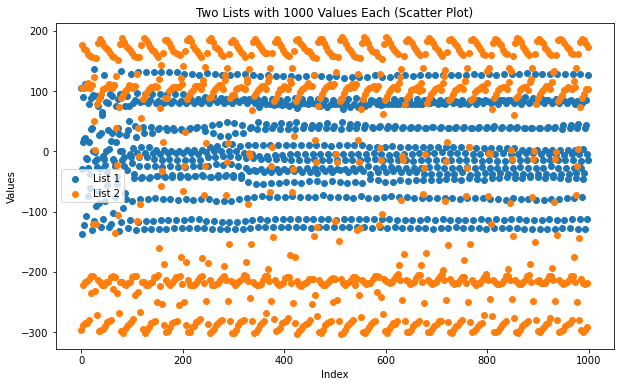

In [12]:
a_data = """105	-29	-137	15	90	20	-122	112	22	-11	-107	106	-13	-27	-74	79	16	-60	-38	89	37	-130	38	94	0	-116	136	-1	-16	-91	92	-13	-26	-66	75	27	-85	-29	91	31	-125	60	66	-7	-112	127	-13	-22	-83	82	0	-34	-55	81	36	-125	4	95	17	-121	92	31	-12	-103	110	-16	-25	-75	76	15	-54	-43	87	39	-132	29	96	1	-118	133	1	-14	-94	93	-9	-25	-69	75	27	-79	-31	92	36	-127	50	75	-5	-114	129	-10	-20	-82	81	6	-37	-45	85	42	-130	24	97	-2	-117	132	-9	-24	-79	82	7	-44	-42	84	41	-128	31	96	-2	-116	131	-10	-25	-79	81	8	-44	-43	85	40	-128	31	96	-2	-115	131	-12	-24	-78	81	2	-41	-41	83	37	-128	38	95	-4	-114	131	-14	-26	-79	81	2	-41	-43	82	38	-129	35	95	-2	-114	132	-13	-25	-79	81	0	-39	-42	83	38	-127	36	95	-3	-114	131	-15	-26	-80	80	1	-40	-42	84	37	-127	36	95	-3	-114	129	-14	-26	-79	80	2	-41	-42	84	37	-127	39	88	-3	-113	129	-14	-25	-80	80	2	-41	-41	84	39	-127	40	87	-5	-112	127	-15	-24	-79	80	2	-40	-41	84	40	-127	33	90	-1	-115	130	-10	-24	-79	80	8	-43	-42	85	43	-128	31	92	0	-116	129	-9	-21	-82	82	9	-40	-42	86	45	-129	25	88	1	-118	127	-7	-22	-83	81	12	-41	-39	87	48	-128	26	84	1	-118	127	-8	-21	-82	80	13	-42	-39	87	47	-129	30	85	0	-117	129	-9	-24	-79	82	9	-44	-39	85	43	-129	31	87	-3	-116	129	-11	-28	-78	81	10	-50	-33	87	39	-127	40	85	-5	-114	127	-11	-31	-75	80	11	-54	-33	87	37	-125	48	73	-7	-112	125	-12	-30	-74	80	11	-54	-34	87	37	-126	45	78	-7	-114	126	-13	-29	-75	79	10	-52	-34	87	39	-126	43	77	-6	-112	125	-13	-29	-75	78	10	-53	-34	86	37	-125	47	77	-6	-113	125	-12	-30	-75	79	10	-51	-32	87	37	-126	46	76	-5	-112	125	-14	-28	-74	79	11	-51	-33	88	37	-126	49	72	-5	-112	123	-14	-29	-76	79	10	-52	-35	87	38	-126	43	80	-5	-113	125	-14	-28	-75	79	10	-49	-35	87	39	-127	43	80	-5	-113	126	-13	-27	-76	78	10	-49	-36	87	39	-126	44	76	-5	-113	125	-14	-28	-73	79	10	-53	-33	86	38	-125	47	73	-5	-112	124	-15	-27	-76	78	9	-49	-34	86	39	-126	42	79	-4	-114	125	-15	-29	-76	79	10	-50	-31	87	37	-125	48	71	-5	-112	122	-15	-29	-75	78	10	-52	-34	87	38	-126	45	73	-4	-113	124	-15	-28	-77	78	11	-50	-33	88	38	-126	45	74	-5	-113	123	-15	-28	-74	79	10	-52	-33	86	38	-126	44	75	-4	-113	124	-12	-25	-77	79	8	-46	-37	86	40	-127	38	84	-3	-113	126	-13	-27	-77	79	8	-48	-35	86	40	-125	42	77	-4	-113	124	-15	-26	-76	79	8	-50	-34	87	39	-127	42	78	-6	-113	123	-14	-26	-74	79	9	-51	-33	87	39	-126	42	78	-4	-114	126	-14	-27	-76	79	8	-48	-35	86	38	-127	41	79	-4	-114	127	-14	-27	-76	79	8	-49	-35	87	39	-127	41	79	-4	-114	125	-16	-28	-77	79	7	-48	-35	87	39	-127	41	79	-3	-114	126	-14	-28	-77	79	7	-48	-38	86	38	-127	39	82	-3	-113	126	-14	-26	-78	80	7	-47	-37	86	40	-128	40	82	-2	-114	126	-15	-26	-78	78	7	-47	-37	86	38	-127	40	81	-1	-113	127	-14	-28	-77	78	7	-46	-37	86	39	-127	38	83	-2	-114	127	-14	-28	-78	80	7	-46	-37	84	39	-126	40	82	-3	-114	126	-14	-27	-79	78	8	-47	-35	85	39	-127	40	81	-3	-114	127	-14	-26	-78	79	7	-44	-40	86	39	-127	39	84	-4	-114	128	-15	-27	-78	79	6	-46	-37	85	38	-127	41	83	-5	-112	127	-16	-26	-77	80	6	-47	-36	85	38	-128	40	84	-2	-114	128	-14	-27	-79	80	6	-45	-38	85	39	-127	42	83	-5	-113	126	-16	-27	-79	79	5	-45	-36	85	39	-127	41	85	-3	-114	129	-16	-27	-80	80	5	-43	-37	85	39	-127	41	86	-5	-113	128	-14	-27	-77	80	5	-45	-38	84	39	-127	40	87	-4	-113	129	-15	-26	-79	79	3	-44	-38	84	39	-128	39	90	-3	-114	130	-14	-27	-79	80	3	-42	-39	84	39	-128	38	88	-3	-114	129	-14	-28	-80	81	2	-43	-37	85	39	-128	39	89	-5	-114	129	-14	-28	-80	80	3	-44	-38	85	39	-128	41	86	-5	-113	128	-14	-25	-79	81	2	-43	-39	84	39	-128	41	87	-4	-114	128	-14	-27	-79	81	3	-44	-37	86	37	-127	44	86	-6	-114	128	-15	-28	-78	80	3	-46	-37	84	38	-127	44	86	-5	-113	129	-15	-28	-78	79	2	-45	-36	84	38	-129	46	84	-4	-112	128	-16	-27	-76	80	4	-46	-36	85	39	-128	43	85	-5	-112	127	-14
"""
t_data = """-296	105	177	-221	-288	105	170	-217	-285	110	168	-215	-284	113	162	-211	-279	105	159	-206	-235	110	156	-207	-120	124	50	-232	3	155	-120	-271	78	180	-214	-298	87	187	-217	-297	96	181	-222	-294	103	175	-221	-289	105	171	-216	-283	106	168	-216	-281	112	164	-208	-280	105	159	-206	-229	110	157	-208	-135	125	38	-235	-22	151	-106	-268	73	178	-216	-298	89	188	-217	-301	94	182	-220	-295	100	175	-221	-290	104	172	-218	-286	110	169	-216	-283	109	163	-209	-278	105	159	-206	-238	108	156	-206	-116	129	39	-233	-8	157	-87	-267	56	176	-216	-295	87	188	-217	-302	93	185	-221	-296	99	180	-222	-292	104	173	-218	-284	106	168	-217	-283	107	166	-209	-281	108	161	-208	-250	106	157	-205	-160	120	72	-224	-57	144	-32	-253	16	163	-187	-288	88	185	-214	-299	89	185	-219	-298	100	180	-221	-291	103	173	-219	-284	107	167	-213	-283	107	163	-209	-281	107	162	-208	-255	106	160	-207	-176	122	112	-220	-65	141	-25	-250	32	166	-183	-288	87	184	-214	-300	93	188	-221	-299	98	183	-222	-292	102	175	-221	-289	108	170	-219	-283	108	166	-213	-281	109	161	-209	-278	103	157	-206	-177	119	111	-218	-73	140	-24	-249	14	163	-186	-287	89	185	-214	-301	91	188	-221	-298	98	181	-222	-295	103	174	-220	-288	107	171	-218	-284	110	168	-213	-281	110	161	-210	-279	103	158	-207	-190	118	127	-214	-72	138	-18	-248	14	162	-154	-282	89	182	-215	-302	93	184	-217	-301	94	182	-221	-296	103	175	-219	-288	105	170	-215	-283	106	165	-212	-281	105	161	-205	-279	103	156	-206	-183	115	120	-215	-88	136	-3	-243	-7	160	-154	-282	68	181	-217	-301	92	187	-220	-299	97	182	-222	-294	102	176	-221	-288	105	171	-220	-284	108	167	-213	-282	108	163	-207	-269	104	163	-207	-196	116	123	-215	-67	139	-25	-248	8	163	-142	-278	84	181	-214	-298	89	186	-218	-297	97	179	-221	-293	103	175	-220	-284	104	169	-218	-283	108	163	-210	-281	107	160	-208	-277	104	158	-209	-172	119	113	-219	-67	138	-30	-252	26	166	-176	-284	83	184	-215	-303	91	187	-221	-298	98	179	-223	-295	103	177	-220	-290	105	172	-219	-286	109	167	-216	-284	113	166	-212	-280	109	162	-212	-253	109	156	-212	-140	127	19	-238	-18	155	-126	-274	76	181	-213	-299	88	186	-218	-302	96	186	-222	-297	102	179	-222	-288	106	173	-219	-285	109	167	-215	-283	112	164	-211	-281	108	158	-210	-250	111	159	-212	-115	131	-4	-246	-18	157	-148	-281	84	185	-212	-303	88	189	-219	-302	97	185	-222	-296	104	178	-219	-290	106	171	-217	-286	105	168	-214	-283	111	164	-208	-279	106	159	-208	-221	111	157	-211	-131	128	19	-239	-17	155	-127	-275	70	179	-213	-299	87	189	-216	-302	95	186	-220	-296	102	179	-219	-292	105	172	-218	-286	106	167	-212	-283	108	165	-207	-282	104	165	-207	-233	108	159	-208	-123	129	5	-242	-15	154	-104	-270	62	178	-211	-298	86	189	-215	-301	92	186	-217	-295	98	179	-219	-290	103	173	-216	-285	106	169	-212	-286	107	165	-207	-282	103	162	-203	-189	113	123	-214	-80	136	-7	-246	-14	159	-170	-282	79	183	-213	-300	88	187	-215	-300	94	183	-220	-296	102	180	-219	-290	104	173	-217	-286	103	169	-210	-285	106	164	-205	-282	100	160	-205	-188	113	102	-217	-70	139	-28	-251	-5	161	-168	-284	80	183	-213	-300	89	188	-217	-299	96	184	-220	-295	98	179	-218	-290	103	174	-217	-286	105	168	-212	-282	106	164	-206	-281	101	159	-204	-197	114	125	-213	-82	135	-16	-247	15	165	-155	-283	85	185	-212	-299	88	187	-216	-301	95	183	-220	-295	101	178	-219	-290	104	175	-218	-288	107	168	-213	-283	106	164	-208	-280	103	160	-208	-181	116	117	-219	-74	138	-27	-250	8	163	-154	-283	85	185	-213	-300	89	187	-218	-298	98	183	-221	-295	102	178	-218	-289	104	173	-218	-286	106	168	-213	-285	108	162	-208	-271	102	160	-205	-204	114	134	-213	-74	138	-3	-245	-5	160	-121	-273	71	180	-214	-300	89	187	-216	-300	95	185	-220	-298	102	179	-220	-293	105	176	-218	-288	106	169	-214	-284	107	164	-207	-282	104	161	-206	-195	115	138	-214	-86	134	3	-245	-13	158	-140	-277	60	180	-213	-300	88	188	-216	-301	92	186	-220	-296	102	181	-220	-289	105	173	-217	-286	106	169	-213	-284	107	164	-207	-281	101	160	-205	-187	115	120	-216	-75	139	-12	-248	1	161	-151	-280	78	183	-215	-298	89	187	-213	-300	95	183	-219	-294	100	179	-219	-292	103	172	-219	-287	109	169	-213	-285	108	163	-206	-277	104	160	-207	-193	115	131	-213	-84	134	-13	-248	-1	160	-138	-279	83	185	-213	-300	89	187	-216	-298	94	184	-220	-296	101	179	-219	-290	104	173	-217	-287	106	170	-213	-284	105	164	-206	-280	103	162	-207	-175	117	107	-216	-72	139	-24	-250	4	162	-144	-279	73	182	-212	-297	88	187	-219	-299	96	185	-220	-296	103	178	-219	-291	104	173
"""

plt.figure(figsize=(10, 6))

# Plot the two lists as scatter plots
plt.scatter(range(len(list1)), list1, label='List 1')
plt.scatter(range(len(list2)), list2, label='List 2')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Two Lists with 1000 Values Each (Scatter Plot)')
plt.legend()

# Display the plot
plt.show()




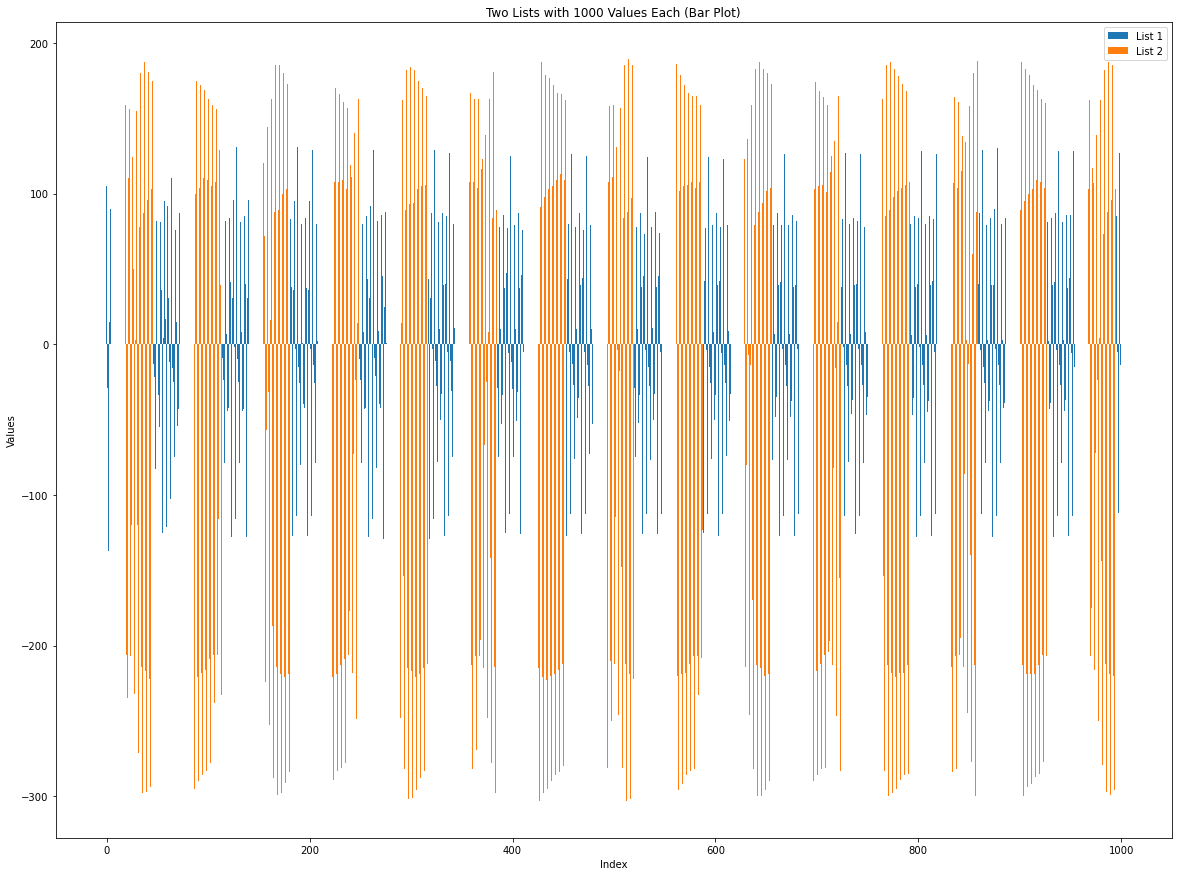

In [14]:
a_data = """105	-29	-137	15	90	20	-122	112	22	-11	-107	106	-13	-27	-74	79	16	-60	-38	89	37	-130	38	94	0	-116	136	-1	-16	-91	92	-13	-26	-66	75	27	-85	-29	91	31	-125	60	66	-7	-112	127	-13	-22	-83	82	0	-34	-55	81	36	-125	4	95	17	-121	92	31	-12	-103	110	-16	-25	-75	76	15	-54	-43	87	39	-132	29	96	1	-118	133	1	-14	-94	93	-9	-25	-69	75	27	-79	-31	92	36	-127	50	75	-5	-114	129	-10	-20	-82	81	6	-37	-45	85	42	-130	24	97	-2	-117	132	-9	-24	-79	82	7	-44	-42	84	41	-128	31	96	-2	-116	131	-10	-25	-79	81	8	-44	-43	85	40	-128	31	96	-2	-115	131	-12	-24	-78	81	2	-41	-41	83	37	-128	38	95	-4	-114	131	-14	-26	-79	81	2	-41	-43	82	38	-129	35	95	-2	-114	132	-13	-25	-79	81	0	-39	-42	83	38	-127	36	95	-3	-114	131	-15	-26	-80	80	1	-40	-42	84	37	-127	36	95	-3	-114	129	-14	-26	-79	80	2	-41	-42	84	37	-127	39	88	-3	-113	129	-14	-25	-80	80	2	-41	-41	84	39	-127	40	87	-5	-112	127	-15	-24	-79	80	2	-40	-41	84	40	-127	33	90	-1	-115	130	-10	-24	-79	80	8	-43	-42	85	43	-128	31	92	0	-116	129	-9	-21	-82	82	9	-40	-42	86	45	-129	25	88	1	-118	127	-7	-22	-83	81	12	-41	-39	87	48	-128	26	84	1	-118	127	-8	-21	-82	80	13	-42	-39	87	47	-129	30	85	0	-117	129	-9	-24	-79	82	9	-44	-39	85	43	-129	31	87	-3	-116	129	-11	-28	-78	81	10	-50	-33	87	39	-127	40	85	-5	-114	127	-11	-31	-75	80	11	-54	-33	87	37	-125	48	73	-7	-112	125	-12	-30	-74	80	11	-54	-34	87	37	-126	45	78	-7	-114	126	-13	-29	-75	79	10	-52	-34	87	39	-126	43	77	-6	-112	125	-13	-29	-75	78	10	-53	-34	86	37	-125	47	77	-6	-113	125	-12	-30	-75	79	10	-51	-32	87	37	-126	46	76	-5	-112	125	-14	-28	-74	79	11	-51	-33	88	37	-126	49	72	-5	-112	123	-14	-29	-76	79	10	-52	-35	87	38	-126	43	80	-5	-113	125	-14	-28	-75	79	10	-49	-35	87	39	-127	43	80	-5	-113	126	-13	-27	-76	78	10	-49	-36	87	39	-126	44	76	-5	-113	125	-14	-28	-73	79	10	-53	-33	86	38	-125	47	73	-5	-112	124	-15	-27	-76	78	9	-49	-34	86	39	-126	42	79	-4	-114	125	-15	-29	-76	79	10	-50	-31	87	37	-125	48	71	-5	-112	122	-15	-29	-75	78	10	-52	-34	87	38	-126	45	73	-4	-113	124	-15	-28	-77	78	11	-50	-33	88	38	-126	45	74	-5	-113	123	-15	-28	-74	79	10	-52	-33	86	38	-126	44	75	-4	-113	124	-12	-25	-77	79	8	-46	-37	86	40	-127	38	84	-3	-113	126	-13	-27	-77	79	8	-48	-35	86	40	-125	42	77	-4	-113	124	-15	-26	-76	79	8	-50	-34	87	39	-127	42	78	-6	-113	123	-14	-26	-74	79	9	-51	-33	87	39	-126	42	78	-4	-114	126	-14	-27	-76	79	8	-48	-35	86	38	-127	41	79	-4	-114	127	-14	-27	-76	79	8	-49	-35	87	39	-127	41	79	-4	-114	125	-16	-28	-77	79	7	-48	-35	87	39	-127	41	79	-3	-114	126	-14	-28	-77	79	7	-48	-38	86	38	-127	39	82	-3	-113	126	-14	-26	-78	80	7	-47	-37	86	40	-128	40	82	-2	-114	126	-15	-26	-78	78	7	-47	-37	86	38	-127	40	81	-1	-113	127	-14	-28	-77	78	7	-46	-37	86	39	-127	38	83	-2	-114	127	-14	-28	-78	80	7	-46	-37	84	39	-126	40	82	-3	-114	126	-14	-27	-79	78	8	-47	-35	85	39	-127	40	81	-3	-114	127	-14	-26	-78	79	7	-44	-40	86	39	-127	39	84	-4	-114	128	-15	-27	-78	79	6	-46	-37	85	38	-127	41	83	-5	-112	127	-16	-26	-77	80	6	-47	-36	85	38	-128	40	84	-2	-114	128	-14	-27	-79	80	6	-45	-38	85	39	-127	42	83	-5	-113	126	-16	-27	-79	79	5	-45	-36	85	39	-127	41	85	-3	-114	129	-16	-27	-80	80	5	-43	-37	85	39	-127	41	86	-5	-113	128	-14	-27	-77	80	5	-45	-38	84	39	-127	40	87	-4	-113	129	-15	-26	-79	79	3	-44	-38	84	39	-128	39	90	-3	-114	130	-14	-27	-79	80	3	-42	-39	84	39	-128	38	88	-3	-114	129	-14	-28	-80	81	2	-43	-37	85	39	-128	39	89	-5	-114	129	-14	-28	-80	80	3	-44	-38	85	39	-128	41	86	-5	-113	128	-14	-25	-79	81	2	-43	-39	84	39	-128	41	87	-4	-114	128	-14	-27	-79	81	3	-44	-37	86	37	-127	44	86	-6	-114	128	-15	-28	-78	80	3	-46	-37	84	38	-127	44	86	-5	-113	129	-15	-28	-78	79	2	-45	-36	84	38	-129	46	84	-4	-112	128	-16	-27	-76	80	4	-46	-36	85	39	-128	43	85	-5	-112	127	-14
"""
t_data = """-296	105	177	-221	-288	105	170	-217	-285	110	168	-215	-284	113	162	-211	-279	105	159	-206	-235	110	156	-207	-120	124	50	-232	3	155	-120	-271	78	180	-214	-298	87	187	-217	-297	96	181	-222	-294	103	175	-221	-289	105	171	-216	-283	106	168	-216	-281	112	164	-208	-280	105	159	-206	-229	110	157	-208	-135	125	38	-235	-22	151	-106	-268	73	178	-216	-298	89	188	-217	-301	94	182	-220	-295	100	175	-221	-290	104	172	-218	-286	110	169	-216	-283	109	163	-209	-278	105	159	-206	-238	108	156	-206	-116	129	39	-233	-8	157	-87	-267	56	176	-216	-295	87	188	-217	-302	93	185	-221	-296	99	180	-222	-292	104	173	-218	-284	106	168	-217	-283	107	166	-209	-281	108	161	-208	-250	106	157	-205	-160	120	72	-224	-57	144	-32	-253	16	163	-187	-288	88	185	-214	-299	89	185	-219	-298	100	180	-221	-291	103	173	-219	-284	107	167	-213	-283	107	163	-209	-281	107	162	-208	-255	106	160	-207	-176	122	112	-220	-65	141	-25	-250	32	166	-183	-288	87	184	-214	-300	93	188	-221	-299	98	183	-222	-292	102	175	-221	-289	108	170	-219	-283	108	166	-213	-281	109	161	-209	-278	103	157	-206	-177	119	111	-218	-73	140	-24	-249	14	163	-186	-287	89	185	-214	-301	91	188	-221	-298	98	181	-222	-295	103	174	-220	-288	107	171	-218	-284	110	168	-213	-281	110	161	-210	-279	103	158	-207	-190	118	127	-214	-72	138	-18	-248	14	162	-154	-282	89	182	-215	-302	93	184	-217	-301	94	182	-221	-296	103	175	-219	-288	105	170	-215	-283	106	165	-212	-281	105	161	-205	-279	103	156	-206	-183	115	120	-215	-88	136	-3	-243	-7	160	-154	-282	68	181	-217	-301	92	187	-220	-299	97	182	-222	-294	102	176	-221	-288	105	171	-220	-284	108	167	-213	-282	108	163	-207	-269	104	163	-207	-196	116	123	-215	-67	139	-25	-248	8	163	-142	-278	84	181	-214	-298	89	186	-218	-297	97	179	-221	-293	103	175	-220	-284	104	169	-218	-283	108	163	-210	-281	107	160	-208	-277	104	158	-209	-172	119	113	-219	-67	138	-30	-252	26	166	-176	-284	83	184	-215	-303	91	187	-221	-298	98	179	-223	-295	103	177	-220	-290	105	172	-219	-286	109	167	-216	-284	113	166	-212	-280	109	162	-212	-253	109	156	-212	-140	127	19	-238	-18	155	-126	-274	76	181	-213	-299	88	186	-218	-302	96	186	-222	-297	102	179	-222	-288	106	173	-219	-285	109	167	-215	-283	112	164	-211	-281	108	158	-210	-250	111	159	-212	-115	131	-4	-246	-18	157	-148	-281	84	185	-212	-303	88	189	-219	-302	97	185	-222	-296	104	178	-219	-290	106	171	-217	-286	105	168	-214	-283	111	164	-208	-279	106	159	-208	-221	111	157	-211	-131	128	19	-239	-17	155	-127	-275	70	179	-213	-299	87	189	-216	-302	95	186	-220	-296	102	179	-219	-292	105	172	-218	-286	106	167	-212	-283	108	165	-207	-282	104	165	-207	-233	108	159	-208	-123	129	5	-242	-15	154	-104	-270	62	178	-211	-298	86	189	-215	-301	92	186	-217	-295	98	179	-219	-290	103	173	-216	-285	106	169	-212	-286	107	165	-207	-282	103	162	-203	-189	113	123	-214	-80	136	-7	-246	-14	159	-170	-282	79	183	-213	-300	88	187	-215	-300	94	183	-220	-296	102	180	-219	-290	104	173	-217	-286	103	169	-210	-285	106	164	-205	-282	100	160	-205	-188	113	102	-217	-70	139	-28	-251	-5	161	-168	-284	80	183	-213	-300	89	188	-217	-299	96	184	-220	-295	98	179	-218	-290	103	174	-217	-286	105	168	-212	-282	106	164	-206	-281	101	159	-204	-197	114	125	-213	-82	135	-16	-247	15	165	-155	-283	85	185	-212	-299	88	187	-216	-301	95	183	-220	-295	101	178	-219	-290	104	175	-218	-288	107	168	-213	-283	106	164	-208	-280	103	160	-208	-181	116	117	-219	-74	138	-27	-250	8	163	-154	-283	85	185	-213	-300	89	187	-218	-298	98	183	-221	-295	102	178	-218	-289	104	173	-218	-286	106	168	-213	-285	108	162	-208	-271	102	160	-205	-204	114	134	-213	-74	138	-3	-245	-5	160	-121	-273	71	180	-214	-300	89	187	-216	-300	95	185	-220	-298	102	179	-220	-293	105	176	-218	-288	106	169	-214	-284	107	164	-207	-282	104	161	-206	-195	115	138	-214	-86	134	3	-245	-13	158	-140	-277	60	180	-213	-300	88	188	-216	-301	92	186	-220	-296	102	181	-220	-289	105	173	-217	-286	106	169	-213	-284	107	164	-207	-281	101	160	-205	-187	115	120	-216	-75	139	-12	-248	1	161	-151	-280	78	183	-215	-298	89	187	-213	-300	95	183	-219	-294	100	179	-219	-292	103	172	-219	-287	109	169	-213	-285	108	163	-206	-277	104	160	-207	-193	115	131	-213	-84	134	-13	-248	-1	160	-138	-279	83	185	-213	-300	89	187	-216	-298	94	184	-220	-296	101	179	-219	-290	104	173	-217	-287	106	170	-213	-284	105	164	-206	-280	103	162	-207	-175	117	107	-216	-72	139	-24	-250	4	162	-144	-279	73	182	-212	-297	88	187	-219	-299	96	185	-220	-296	103	178	-219	-291	104	173
"""

x = list(range(1000))

# Create a figure and axis with an increased size (e.g., 10 inches by 6 inches)
plt.figure(figsize=(20, 15))

# Plot the two lists as bar plots side by side
plt.bar(x, list1, width=0.4, align='center', label='List 1')
plt.bar([i + 0.4 for i in x], list2, width=0.4, align='center', label='List 2')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Two Lists with 1000 Values Each (Bar Plot)')
plt.legend()

# Display the plot
plt.show()